In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# URL orqali ma'lumotlarni yuklab olish
url = "https://raw.githubusercontent.com/JamshidSalimov/Ai-Fayls/refs/heads/master/E-Commerce-Dataset.csv"
data = pd.read_csv(url)

# Dastlabki ma'lumotlarni ko'rish
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [18]:
# Null qiymatlarni tekshirish
print(data.isnull().sum())

# Keraksiz ustunlar bo'lsa, ularni o'chirib tashlash
# Misol uchun 'User_ID' kabi identifikatsiya ma'lumotlarini olib tashlash
data = data.drop(columns=['HourSpendOnApp'])

# 0 qiymatlarni to'ldirish
# Odatda numerik ustunlar uchun median qiymatni almashtirish
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    data[col].replace(0, data[col].median(), inplace=True)

# Yangi tozalangan ma'lumotlarni ko'rish
print(data.describe())

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
             Churn       Tenure     CityTier  WarehouseToHome  \
count  5630.000000  5366.000000  5630.000000      5379.000000   
mean      0.168384    11.041931     1.654707        15.639896   
std       0.374240     7.924805     0.915389         8.531475   
min       0.000000     1.000000     1.000000         5.000000 

<ipython-input-18-068f53ff91c8>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, data[col].median(), inplace=True)


In [24]:
# X (xususiyatlar) va y (natijalar) ni ajratish
X = data.drop("PreferredLoginDevice", axis=1)  # "Exited" natijaviy ustun
y = data["PreferredLoginDevice"]  # "Exited" natijaviy ustun

# Trening va test to'plamlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for loading and cleaning data) ...

# X (xususiyatlar) va y (natijalar) ni ajratish
X = data.drop("PreferredLoginDevice", axis=1)  # "Exited" natijaviy ustun
y = data["PreferredLoginDevice"]  # "Exited" natijaviy ustun

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns and encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable as well
y = label_encoder.fit_transform(y)

# Trening va test to'plamlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini yaratish
dt_model = DecisionTreeClassifier(random_state=42)
# Modelni trening ma'lumotlarida o'qitish
dt_model.fit(X_train, y_train)

# ... (rest of your code for prediction and evaluation) ...

DecisionTreeClassifier(random_state=42)

Aniqlik (Accuracy): 0.8827708703374778

Klassifikatsiya hisoboti:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       321
           1       0.92      0.91      0.92       556
           2       0.94      0.90      0.92       249

    accuracy                           0.88      1126
   macro avg       0.88      0.88      0.88      1126
weighted avg       0.89      0.88      0.88      1126



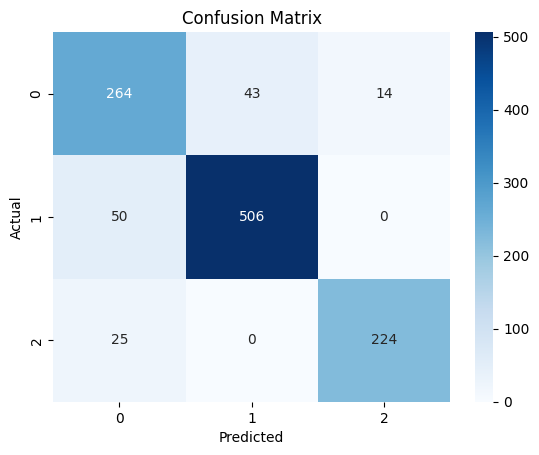

In [28]:
# Test ma'lumotlarida modelni sinash
y_pred = dt_model.predict(X_test)

# Natijalarni baholash
accuracy = accuracy_score(y_test, y_pred)
print("Aniqlik (Accuracy):", accuracy)
print("\nKlassifikatsiya hisoboti:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()